In [6]:
!pip install ploty

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly modules

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [16]:
data=pd.read_csv("train.csv", index_col = [0])
data.head()
data=data.rename(columns={"tweet":"text"})

In [20]:
data.head()

,text,label
id,,
42884,@USER I’m done with you as well. An INTENTIONA...,NOT
92152,I now have over 6k followers. Only 94k to go ...,NOT
65475,@USER Tom was bought! He is more interested in...,NOT
22144,@USER @USER Even her brother thinks she is a m...,OFF
81048,@USER @USER @USER @USER @USER I can understand...,OFF


In [ ]:
#BAsic feature Extraction

In [22]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split(" ")))
data[['text','word_count']].head()

,text,word_count
id,,
42884,@USER I’m done with you as well. An INTENTIONA...,49
92152,I now have over 6k followers. Only 94k to go ...,20
65475,@USER Tom was bought! He is more interested in...,13
22144,@USER @USER Even her brother thinks she is a m...,11
81048,@USER @USER @USER @USER @USER I can understand...,57


In [ ]:
#Total = data['word_count'].sum()
#Total
#x=len(data['text'])
#x
#avar=Total/x
#avar
#data.drop(data.text[data['word_count'] < 10].index, inplace=True)


In [24]:
x=len(data)
x

12313

In [25]:
#NO of char count
data['char_count'] = data['text'].str.len() ## this also includes spaces
data[['text','char_count']].head()

,text,char_count
id,,
42884,@USER I’m done with you as well. An INTENTIONA...,269
92152,I now have over 6k followers. Only 94k to go ...,88
65475,@USER Tom was bought! He is more interested in...,72
22144,@USER @USER Even her brother thinks she is a m...,57
81048,@USER @USER @USER @USER @USER I can understand...,295


In [26]:
#Avarage word in a sentence
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['text'].apply(lambda x: avg_word(x))
data[['text','avg_word']].head()

,text,avg_word
id,,
42884,@USER I’m done with you as well. An INTENTIONA...,4.510204
92152,I now have over 6k followers. Only 94k to go ...,3.833333
65475,@USER Tom was bought! He is more interested in...,4.615385
22144,@USER @USER Even her brother thinks she is a m...,4.272727
81048,@USER @USER @USER @USER @USER I can understand...,4.192982


In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['text','stopwords']].head()

ModuleNotFoundError: No module named 'nltk'

In [ ]:
data['hastags'] = data['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['text','hastags']].head()

,text,hastags
0,The first time i went we had the best fish I'v...,0
1,pretty good meal,0
2,"Came here for dinner about half a year ago, tr...",0
3,This place has the best penne vodka around! Fo...,0
4,The bar staff and bar area here are really fun...,0


In [ ]:
data['numerics'] = data['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['text','numerics']].head()

,text,numerics
0,The first time i went we had the best fish I'v...,0
1,pretty good meal,0
2,"Came here for dinner about half a year ago, tr...",0
3,This place has the best penne vodka around! Fo...,0
4,The bar staff and bar area here are really fun...,0


In [ ]:
data['upper'] = data['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['text','upper']].head()

,text,upper
0,The first time i went we had the best fish I'v...,1
1,pretty good meal,0
2,"Came here for dinner about half a year ago, tr...",0
3,This place has the best penne vodka around! Fo...,0
4,The bar staff and bar area here are really fun...,2


In [ ]:
#Basic Preprocessing

In [ ]:
#Data transform into lower case
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['text'].head()

0    the first time i went we had the best fish i'v...
1                                     pretty good meal
2    came here for dinner about half a year ago, tr...
3    this place has the best penne vodka around! fo...
4    the bar staff and bar area here are really fun...
Name: text, dtype: object

In [ ]:
#remove punctuation mark
data['text'] = data['text'].str.replace('[^\w\s]','')
data['text'].head()

0    the first time i went we had the best fish ive...
1                                     pretty good meal
2    came here for dinner about half a year ago tri...
3    this place has the best penne vodka around foo...
4    the bar staff and bar area here are really fun...
Name: text, dtype: object

In [ ]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head()

0    first time went best fish ive ever grouper stu...
1                                     pretty good meal
2    came dinner half year ago tried pork buns pret...
3    place best penne vodka around food always fres...
4    bar staff bar area really fun friendly great a...
Name: text, dtype: object

In [ ]:
#Frequent word
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10]
freq

food       74641
good       60999
place      60681
great      49210
like       35638
service    31911
one        31253
really     29487
go         28758
time       28187
dtype: int64

In [ ]:
#Now, let’s remove these words as their presence will not of any use in classification of our text data.
freq = list(freq.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0    first went best fish ive ever grouper stuffed ...
1                                          pretty meal
2    came dinner half year ago tried pork buns pret...
3    best penne vodka around always fresh dinner sp...
4    bar staff bar area fun friendly atmosphere ski...
Name: text, dtype: object

In [ ]:
#rare word
rare = pd.Series(' '.join(data['text']).split()).value_counts()[-10:]
rare

cristianos           1
ehhhhhhhh            1
caipirinhaaverage    1
genrally             1
25c                  1
reasonperhaps        1
fibers               1
onthebone            1
lastnight            1
maltiness            1
dtype: int64

In [ ]:
#Now, let’s remove these words as their presence will not of any use in classification of our text data.
rare = list(rare.index)
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['text'].head()

0    first went best fish ive ever grouper stuffed ...
1                                          pretty meal
2    came dinner half year ago tried pork buns pret...
3    best penne vodka around always fresh dinner sp...
4    bar staff bar area fun friendly atmosphere ski...
Name: text, dtype: object

In [ ]:
#textlob use for 
from textblob import TextBlob
data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    first went best fish give ever grouped stuffed...
1                                          pretty meal
2    came dinner half year ago tried pork guns pret...
3    best penn vodka around always fresh dinner spe...
4    bar staff bar area fun friendly atmosphere ski...
Name: text, dtype: object

In [ ]:
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    first went best fish ive ever grouper stuf lob...
1                                          pretti meal
2    came dinner half year ago tri pork bun pretti ...
3    best penn vodka around alway fresh dinner special
4    bar staff bar area fun friendli atmospher skir...
Name: text, dtype: object

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
data['tokenized_text'] = data['text'].apply(word_tokenize) 
data['tokenized_text'].head()

0    [first, went, best, fish, ive, ever, grouper, ...
1                                       [pretty, meal]
2    [came, dinner, half, year, ago, tried, pork, b...
3    [best, penne, vodka, around, always, fresh, di...
4    [bar, staff, bar, area, fun, friendly, atmosph...
Name: tokenized_text, dtype: object

In [ ]:
#lemitize function  convert into root word
from textblob import Word
data['text'] = data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['text'].head()

0    first went best fish ive ever grouper stuffed ...
1                                          pretty meal
2    came dinner half year ago tried pork bun prett...
3    best penne vodka around always fresh dinner sp...
4    bar staff bar area fun friendly atmosphere ski...
Name: text, dtype: object

In [ ]:
tf1 = (data['text'][1:20]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,pretty,5.0
1,meal,7.0
2,pork,3.0
3,come,6.0
4,came,10.0
5,despite,1.0
6,decent,2.0
7,dish,3.0
8,bun,1.0
9,getting,2.0


In [ ]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['text'].str.contains(word)])))

tf1

,words,tf,idf
0,pretty,5.0,2.242149
1,meal,7.0,2.141998
2,pork,3.0,2.892815
3,come,6.0,1.844464
4,came,10.0,2.066644
5,despite,1.0,4.283812
6,decent,2.0,3.223637
7,dish,3.0,2.077523
8,bun,1.0,3.593569
9,getting,2.0,3.332045


In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,pretty,5.0,2.242149,11.210744
1,meal,7.0,2.141998,14.993986
2,pork,3.0,2.892815,8.678444
3,come,6.0,1.844464,11.066786
4,came,10.0,2.066644,20.666438
5,despite,1.0,4.283812,4.283812
6,decent,2.0,3.223637,6.447274
7,dish,3.0,2.077523,6.232570
8,bun,1.0,3.593569,3.593569
9,getting,2.0,3.332045,6.664089


In [ ]:
#feature extraction technique 1
#beg of word feature extraction technique
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=991, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(data['text'])
train_bow

<100000x991 sparse matrix of type '<class 'numpy.int64'>'
	with 3094063 stored elements in Compressed Sparse Row format>

In [ ]:
#x=bow.get_feature_names()
#x
#dim=bow.fit_transform(data['text'])
#repr(dim)
#print (dim)
#import pandas as pd
#pd.DataFrame(dim.toarray(), columns=bow.get_feature_names())


In [ ]:
##feature extraction technique 2
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=991, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data['text'])
train_vect

<100000x991 sparse matrix of type '<class 'numpy.float64'>'
	with 2665411 stored elements in Compressed Sparse Row format>

In [ ]:
##feature extraction technique 3
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=199, stop_words='english')
doc_term_matrix = count_vect.fit_transform(data['text'].values.astype('U'))

In [ ]:
doc_term_matrix 

<100000x2476 sparse matrix of type '<class 'numpy.int64'>'
	with 3229950 stored elements in Compressed Sparse Row format>

In [ ]:
##feature extraction technique 4
import gensim 
from gensim.models import Word2Vec 
word2vec = Word2Vec(data['tokenized_text'], min_count=3)
word2vec

In [ ]:
words = list(word2vec.wv.vocab)

In [ ]:
##feature selection technique 1
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [ ]:
import random

for i in range(1000):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])
#first_topic = LDA.components_[0]
#first_topic

celebrate
bass
available
trip
unlike
jersey
nj
hot
early
soul
tavern
traffic
age
fondue
hill
slight
whipped
hearty
satisfy
nonetheless
save
write
rock
paella
meant
failed
ring
cantina
hear
missed
sampler
kale
chic
balance
opened
took
pasta
cuban
belly
ceiling
talked
young
located
addition
lovely
meaning
item
truck
gracious
later
slice
brownie
cilantro
outdoor
truffle
night
polenta
accommodate
unfortunately
followed
exposed
intimate
pig
hubby
burned
overcooked
bass
bit
milkshake
regret
wonder
burrito
pizzeria
fry
frankly
world
vanilla
thai
stood
tell
barrio
generally
minor
item
traditional
couch
late
7pm
importantly
vermont
bourbon
single
outstanding
description
girl
9pm
massive
watched
iced
fail
goat
buddy
refreshing
watching
bank
carrot
wrap
share
thing
certainly
disappointed
shouldnt
suggest
par
worth
spy
store
platter
filled
sophisticated
second
square
sea
unexpected
serf
brussels
dollar
relaxed
kimchi
scallion
noisy
puff
bring
runny
japanese
melt
focus
serving
easily
welcoming
chin

In [ ]:
first_topic = LDA.components_[0]

In [ ]:
top_topic_words = first_topic.argsort()[-1000:]
top_topic_words

array([2159,  241,  218,  697, 1234, 2241, 1737, 2126, 1205,  372,  494,
       1633, 1003, 1069, 2212,  809, 1218,  989, 1731, 1594, 1392, 2078,
       2333, 1907, 1711, 2268, 1344,  581,  555,  114, 2370,  214,  800,
        228, 2239, 1818, 1705, 1220, 1983, 1047, 1326, 1564, 2152, 2298,
       1811, 1183,  545,  259, 1767, 2251,  698,  149, 2214, 1358, 1744,
       1691,  262, 1763, 1024,  634, 1075, 2195, 1166,  136,  308, 1949,
       1601, 1354, 2034,  130,   58, 2418, 1459, 2273,  540, 2088, 2327,
       1919, 2096,  864,  153, 2419, 1249,   71,  801,  249, 1650, 1579,
       1946,  929, 1404, 1251,  672, 2253,  848, 2209,  290, 1421,  822,
       1489, 1543,  312,  485, 1116, 2036, 1713, 2006,    4,  189, 1270,
       1180,  157, 1516, 1079, 1050, 1188, 1748,  163, 2446,  461,  613,
       2278, 1813, 1155,  920, 1154, 2007,    5,   50, 1842, 1384, 1912,
       2404,  375, 1203,  396,  501, 1829,  857, 1663, 1067,  345, 1867,
        224, 1383, 2296,  127, 2257,  541,  134, 14

In [ ]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

talking
blow
bet
drove
lemonade
tot
random
summer
lacking
challenge
condiment
pm
happen
hoping
thursday
fancy
layer
haha
rainy
pickle
moment
staying
vibe
sell
pure
trust
meet
dad
credit
appetite
waste
bench
fair
bistro
tortilla
road
puff
lazy
smell
hint
massive
peak
tad
unlike
ride
kill
crap
bother
recommendation
train
drunk
attitude
tight
met
rating
product
bought
recent
hearing
deviled
hotel
thanks
jones
asked
bunch
signature
pile
mentioned
spend
art
advice
winner
nut
tuesday
crab
sticky
veggie
set
store
flavorless
available
winter
likely
airy
fairly
bomb
possibly
personal
sidewalk
giant
moving
lime
dollar
travel
finished
throw
brother
native
favor
opening
particularly
burnt
complete
including
spent
putting
sooo
13
basic
located
kick
avocado
owner
hubby
history
king
raving
awhile
wouldve
combination
deliciousness
turned
ridiculously
jalapeno
generally
jack
soooo
14
addition
rushed
mixed
serf
wheat
change
lack
cheeseburger
consistency
rosemary
flaky
preferred
hope
card
satisfying
bigg

In [ ]:
list=[]
temp=''
for i in top_topic_words:
    temp=count_vect.get_feature_names()[i]
    list.append(temp)

In [ ]:
list

['talking',
 'blow',
 'bet',
 'drove',
 'lemonade',
 'tot',
 'random',
 'summer',
 'lacking',
 'challenge',
 'condiment',
 'pm',
 'happen',
 'hoping',
 'thursday',
 'fancy',
 'layer',
 'haha',
 'rainy',
 'pickle',
 'moment',
 'staying',
 'vibe',
 'sell',
 'pure',
 'trust',
 'meet',
 'dad',
 'credit',
 'appetite',
 'waste',
 'bench',
 'fair',
 'bistro',
 'tortilla',
 'road',
 'puff',
 'lazy',
 'smell',
 'hint',
 'massive',
 'peak',
 'tad',
 'unlike',
 'ride',
 'kill',
 'crap',
 'bother',
 'recommendation',
 'train',
 'drunk',
 'attitude',
 'tight',
 'met',
 'rating',
 'product',
 'bought',
 'recent',
 'hearing',
 'deviled',
 'hotel',
 'thanks',
 'jones',
 'asked',
 'bunch',
 'signature',
 'pile',
 'mentioned',
 'spend',
 'art',
 'advice',
 'winner',
 'nut',
 'tuesday',
 'crab',
 'sticky',
 'veggie',
 'set',
 'store',
 'flavorless',
 'available',
 'winter',
 'likely',
 'airy',
 'fairly',
 'bomb',
 'possibly',
 'personal',
 'sidewalk',
 'giant',
 'moving',
 'lime',
 'dollar',
 'travel',
 

In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-1000:]])
    print('\n')

Top 10 words for topic #0:
['talking', 'blow', 'bet', 'drove', 'lemonade', 'tot', 'random', 'summer', 'lacking', 'challenge', 'condiment', 'pm', 'happen', 'hoping', 'thursday', 'fancy', 'layer', 'haha', 'rainy', 'pickle', 'moment', 'staying', 'vibe', 'sell', 'pure', 'trust', 'meet', 'dad', 'credit', 'appetite', 'waste', 'bench', 'fair', 'bistro', 'tortilla', 'road', 'puff', 'lazy', 'smell', 'hint', 'massive', 'peak', 'tad', 'unlike', 'ride', 'kill', 'crap', 'bother', 'recommendation', 'train', 'drunk', 'attitude', 'tight', 'met', 'rating', 'product', 'bought', 'recent', 'hearing', 'deviled', 'hotel', 'thanks', 'jones', 'asked', 'bunch', 'signature', 'pile', 'mentioned', 'spend', 'art', 'advice', 'winner', 'nut', 'tuesday', 'crab', 'sticky', 'veggie', 'set', 'store', 'flavorless', 'available', 'winter', 'likely', 'airy', 'fairly', 'bomb', 'possibly', 'personal', 'sidewalk', 'giant', 'moving', 'lime', 'dollar', 'travel', 'finished', 'throw', 'brother', 'native', 'favor', 'opening', 'part

['burned', 'beautiful', 'nj', 'spot', 'hardly', 'tax', 'arent', 'smaller', 'spanish', 'fellow', 'generally', 'music', 'update', 'timely', 'health', 'school', 'biggest', 'wrote', 'tea', 'shrimp', 'double', 'alcohol', 'entrance', 'upstairs', 'fish', 'chatting', '90', 'following', 'greet', 'welcomed', 'joint', 'follow', 'moving', 'takeout', 'grabbed', 'process', 'acceptable', 'station', 'tavern', 'allergy', 'tab', 'lobster', '60', 'thursday', 'cousin', 'highly', 'personally', 'hello', 'consider', 'provide', 'fresh', 'site', 'undercooked', 'straight', 'odd', 'air', 'voice', 'inch', 'concerned', 'complaining', 'stick', 'appreciate', 'ny', 'final', 'unfortunate', 'father', 'glad', 'hey', '14', 'planned', 'arriving', 'outstanding', 'stayed', 'apps', 'frequent', 'meet', 'tough', 'noise', 'rate', 'crap', 'hotel', 'cashier', 'cramped', 'originally', 'continue', 'fly', 'desert', 'coat', 'directly', 'forced', 'awesome', 'hearing', 'finishing', 'general', 'shit', 'followed', 'assume', 'wall', 'pote

['brick', 'rosemary', 'promptly', 'slaw', 'visited', 'mild', 'au', 'low', 'tip', 'scrumptious', 'brazilian', 'serf', 'fluffy', 'walked', 'philadelphia', 'prefer', 'saw', 'cinnamon', 'true', 'stopped', 'accompanying', 'upscale', 'various', 'welcome', 'crusty', 'craving', 'average', 'suggest', 'weekend', 'consistency', '25', 'exquisite', 'ground', 'disappointment', 'hanger', 'elegant', 'polite', 'puff', 'twist', 'hidden', 'smoky', 'picked', 'wanting', 'complimented', 'cookshop', 'difficult', 'farm', 'sitting', 'grill', 'sampled', 'kebab', 'gravy', 'round', '45', 'skewer', 'forget', 'gorgeous', 'description', 'slider', 'mash', 'hubby', 'eye', 'hope', 'overpowering', 'read', 'poached', 'doesnt', 'moment', 'anniversary', 'chance', 'tell', 'heat', 'wheat', 'tartar', 'usual', 'late', 'reasonably', 'corner', 'raisin', 'byo', 'wont', 'gluten', 'visiting', '10', 'crowded', 'citrus', 'consisted', 'bitter', 'considering', 'pecan', 'chopped', 'past', 'town', 'honestly', 'gf', 'espresso', 'similar',

['fun', 'finger', 'previous', 'discovered', 'building', 'coast', 'pop', 'finding', 'bone', '13', 'superior', 'dining', 'freshness', 'orange', 'packed', 'recent', 'gluten', 'bet', 'welcome', 'hey', 'burnt', 'corn', 'handle', 'horrible', 'son', 'touch', 'depending', 'welcoming', 'parent', 'count', 'rated', 'feed', 'entire', 'barely', 'beware', 'fav', 'gonna', 'speak', '14', 'period', 'straight', 'bother', 'broccoli', 'various', 'turn', 'incredibly', 'culture', 'bunch', 'hummus', 'fall', 'needed', 'mushroom', 'strip', 'attention', 'meet', 'scallion', 'important', 'ridiculously', 'wrapped', 'satisfy', 'claim', 'admit', 'opening', 'sloppy', 'taken', 'dine', 'mentioned', 'boring', 'talk', 'obviously', 'total', 'wonder', 'raised', 'surprise', 'poor', '23', 'texture', 'positive', '16', 'leftover', 'diet', 'talking', 'include', 'multiple', 'consistency', 'support', 'section', 'ambiance', 'salmon', 'lower', 'update', 'favor', 'lost', 'boyfriend', 'likely', 'montclair', 'cabbage', 'fake', 'stew',

['class', 'hartford', 'memory', 'immediately', 'buddy', 'older', 'break', 'concept', 'daily', 'history', 'cake', 'constantly', 'smile', '40', 'character', 'excited', 'punch', 'exciting', 'mark', 'finish', 'odd', 'apartment', 'pricing', 'attention', 'tucked', 'normal', 'island', 'typically', 'tuna', 'double', 'gotten', 'giant', 'dip', 'seeing', 'rice', 'bc', 'recent', 'beef', 'rittenhouse', 'hat', 'destination', 'suggested', 'liberty', 'known', 'clam', 'drank', 'attractive', 'mango', 'normally', 'polite', 'twist', 'sign', 'saw', 'straight', 'feature', 'changing', 'killer', 'sense', 'veggie', 'depending', 'reminds', 'turned', 'buffalo', 'alright', 'gotta', 'decoration', 'weeknight', 'basically', 'flatbread', 'water', 'various', 'taking', 'appreciate', 'lover', 'hook', 'later', 'multiple', 'tinto', 'beverage', '50', 'rare', 'prompt', 'taken', 'personally', 'homey', 'air', 'fave', 'delightful', '3rd', 'husband', '90', 'exposed', 'line', 'craving', 'buzz', 'serf', 'pour', 'frequent', 'compa

In [ ]:
topic_values = LDA.transform(doc_term_matrix)
topic_values

array([[0.01080441, 0.1173226 , 0.85014831, 0.01084818, 0.01087649],
       [0.06947411, 0.06821624, 0.72133245, 0.06970085, 0.07127635],
       [0.00680006, 0.00684645, 0.45388817, 0.09893623, 0.43352909],
       ...,
       [0.00496771, 0.05696745, 0.00492261, 0.00496565, 0.92817658],
       [0.10772889, 0.12005141, 0.39107925, 0.00284473, 0.37829572],
       [0.71741352, 0.09660695, 0.18132782, 0.00230782, 0.00234389]])

In [ ]:
#data['Topic'] = topic_values.argmax(axis=1)

In [ ]:
#data.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(data['text'].values.astype('U'))

In [ ]:
doc_term_matrix

<100000x39750 sparse matrix of type '<class 'numpy.float64'>'
	with 3828480 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])

bolt
farmacy
scrolled
520
lemonricotta
buffalo
bosom
roared
godlike
labani


In [ ]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
#top_topic_words

In [ ]:
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])

table
bar
night
friend
dish
delicious
menu
drink
nice
restaurant


In [ ]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['table', 'bar', 'night', 'friend', 'dish', 'delicious', 'menu', 'drink', 'nice', 'restaurant']


Top 10 words for topic #1:
['italian', 'sauce', 'ive', 'new', 'delivery', 'pie', 'crust', 'slice', 'best', 'pizza']


Top 10 words for topic #2:
['spot', 'best', 'awesome', 'delicious', 'friendly', 'favorite', 'staff', 'atmosphere', 'amazing', 'love']


Top 10 words for topic #3:
['long', 'toast', 'hour', 'worth', 'blueberry', 'breakfast', 'egg', 'brunch', 'wait', 'pancake']


Top 10 words for topic #4:
['cheesesteak', 'philly', 'fry', 'pat', 'genos', 'sandwich', 'best', 'burger', 'cheese', 'steak']




In [ ]:
topic_values = nmf.transform(doc_term_matrix)
#data['Topic'] = topic_values.argmax(axis=1)
#data.head()

In [ ]:
#pca
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
model = Word2Vec(data['tokenized_text'], min_count=3)

In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [ ]:
#result

In [ ]:
# create a scatter plot of the projection
#pyplot.scatter(result[:, 0], result[:, 1])
#words = list(model.wv.vocab)
#for i, word in enumerate(words):
    #pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
#pyplot.show()

In [ ]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
polarity=[]
subjectivity=[] 
for i in data['text'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [ ]:
data['polarity']=polarity
data['subjectivity']=subjectivity

In [ ]:
data[['userid','text','polarity','subjectivity']].head()

,userid,text,polarity,subjectivity
0,43518,first went best fish ive ever grouper stuffed ...,0.288393,0.311012
1,125414,pretty meal,0.250000,1.000000
2,114069,came dinner half year ago tried pork bun prett...,0.181250,0.491667
3,84464,best penne vodka around always fresh dinner sp...,0.552381,0.457143
4,115682,bar staff bar area fun friendly atmosphere ski...,0.317500,0.480000


In [ ]:
#displaying +ve 
data[['userid','text','polarity','subjectivity']][data.polarity>0].head()

,userid,text,polarity,subjectivity
0,43518,first went best fish ive ever grouper stuffed ...,0.288393,0.311012
1,125414,pretty meal,0.250000,1.000000
2,114069,came dinner half year ago tried pork bun prett...,0.181250,0.491667
3,84464,best penne vodka around always fresh dinner sp...,0.552381,0.457143
4,115682,bar staff bar area fun friendly atmosphere ski...,0.317500,0.480000


In [ ]:
#displaying -ve 
data[['userid','text','polarity','subjectivity']][data.polarity<0.].head()

,userid,text,polarity,subjectivity
10,125300,lame overpriced repulsive scene lame bridge tu...,-0.343750,0.756250
11,25594,got take always curious inside cute cozy custo...,-0.157407,0.800617
14,54194,try hard first impression walking looked real ...,-0.003139,0.658766
23,53531,chickies got worst company work hear way mange...,-0.233333,0.764815
29,5921,dont fall hype found genos pat worst cheeseste...,-0.300000,0.661111


In [ ]:
#Displaying the NEUTRAL comments
data[['userid','text','polarity','subjectivity']][data.polarity==0].head()

,userid,text,polarity,subjectivity
37,14668,overpriced serf 3 8 stay away option,0.0,0.000000
56,10001,make feel home,0.0,0.000000
72,18494,ive eaten north 3rd lot time always thought ex...,0.0,0.396154
129,12142,greaaaat breakfast spot went changed hand dont...,0.0,0.000000
273,70926,yummy,0.0,0.000000


In [ ]:
#Displaying highly subjective reviews
data[['userid','text','polarity','subjectivity']][data.subjectivity>0.8].head()

,userid,text,polarity,subjectivity
1,125414,pretty meal,0.250000,1.000000
5,37315,nice dinner excellent wrap sandwich pizza some...,0.522959,0.833673
11,25594,got take always curious inside cute cozy custo...,-0.157407,0.800617
67,60566,always wondered marvelous soup tasted soupnazi...,1.000000,1.000000
78,25100,favorite restaurant far amazing amesome price ...,0.360000,0.930000


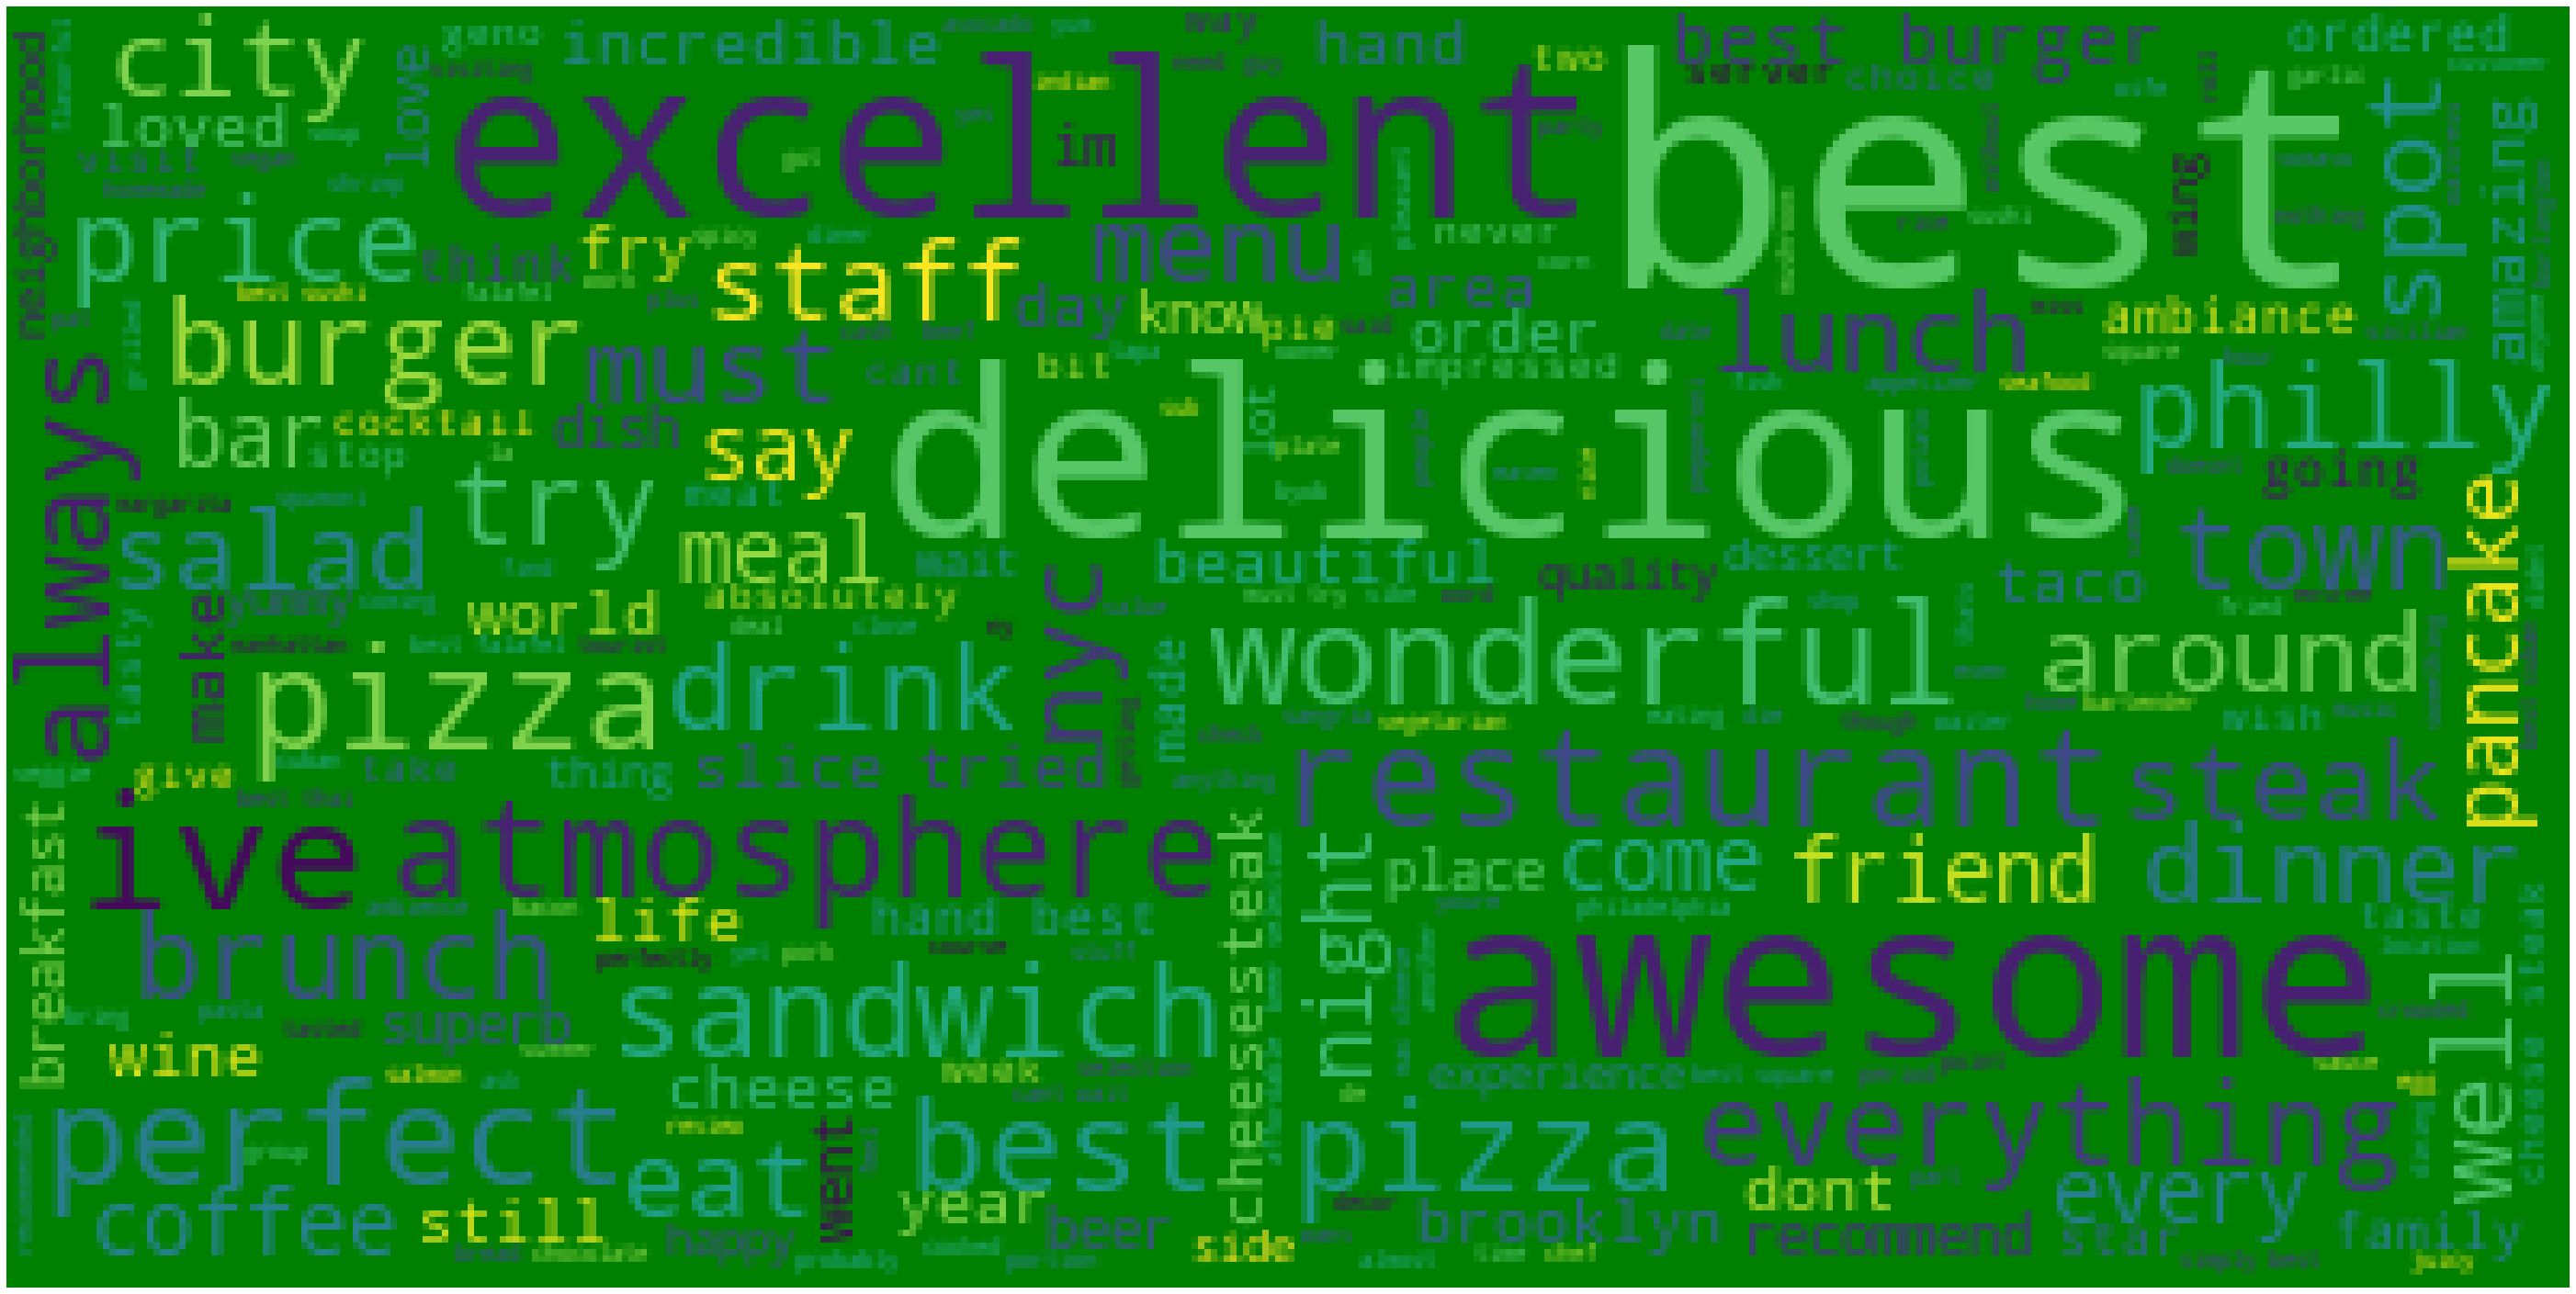

In [ ]:
wc(data['text'][data.polarity>0.8],'green','Common Words' )

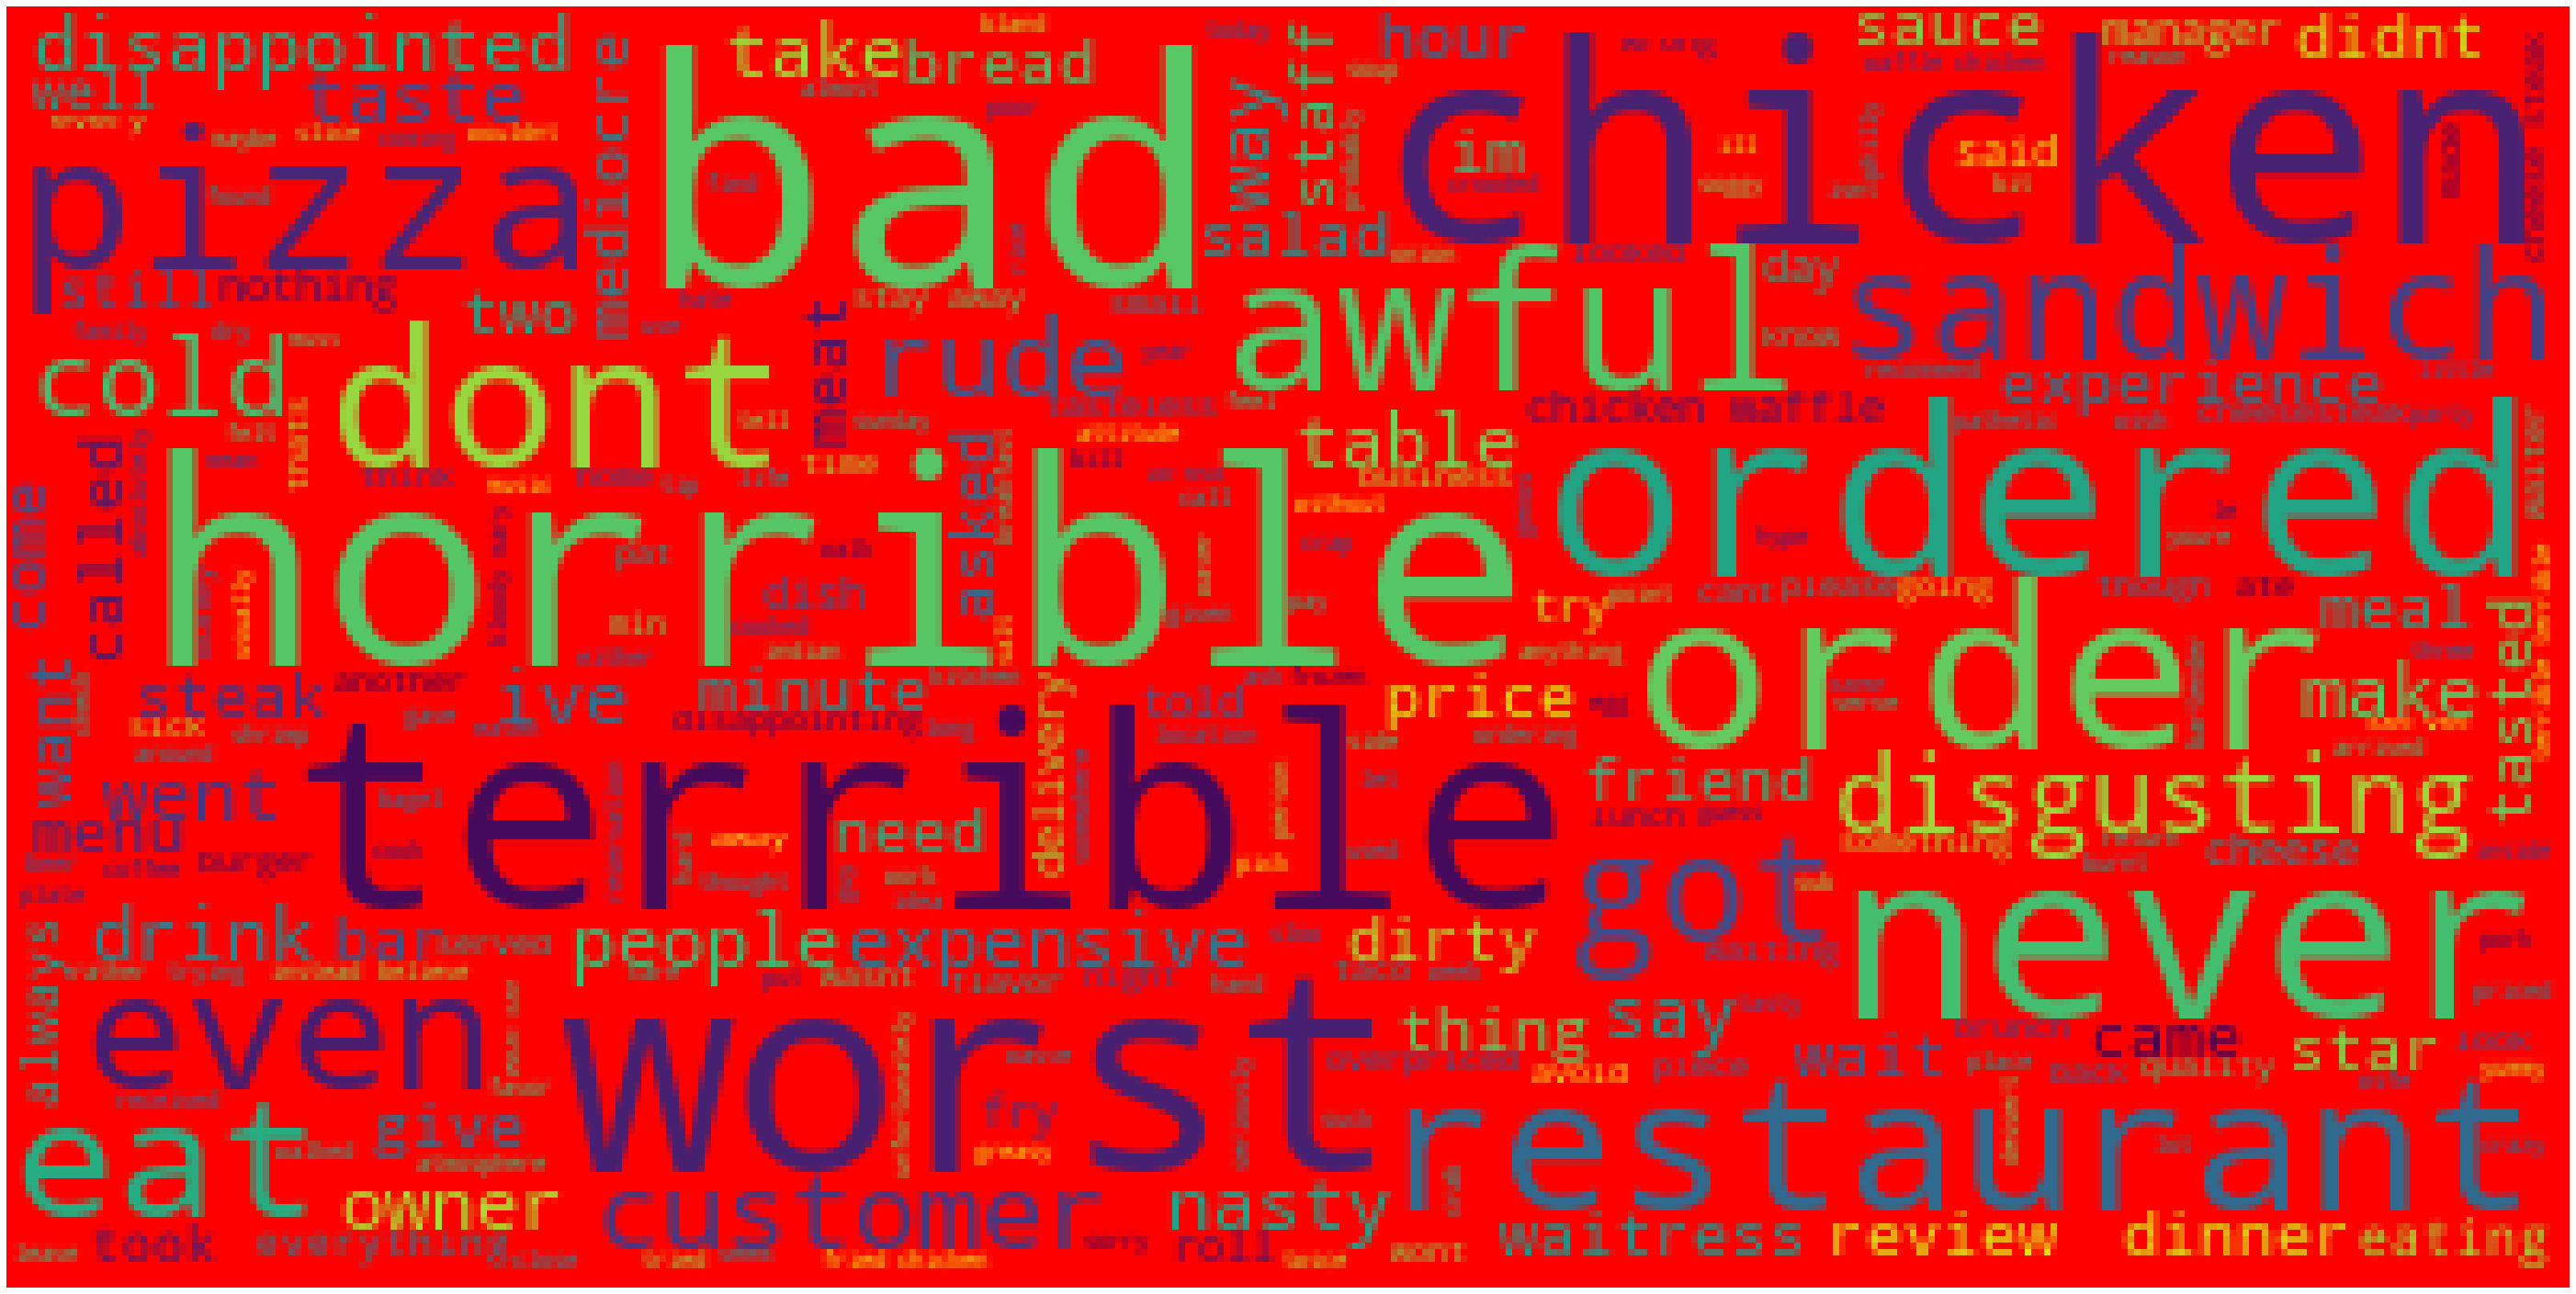

In [ ]:
wc(data['text'][data.polarity<-0.4],'red','Common Words' )

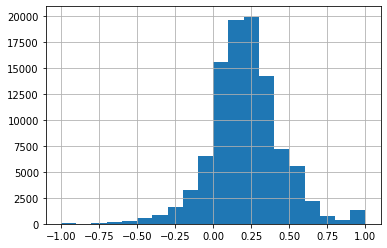

In [ ]:
data.polarity.hist(bins=20)

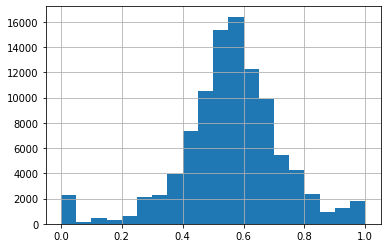

In [ ]:
data.subjectivity.hist(bins=20)